# 미세먼지 농도와 생활건강 용품의 연관성 보기

## 라이브러리/데이터 준비

In [96]:
from google.colab import drive
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [97]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 6 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

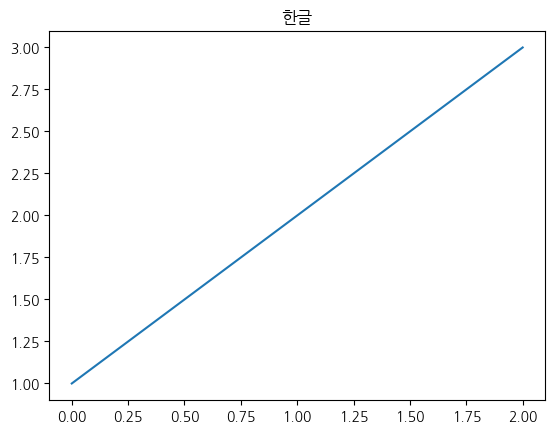

In [98]:
import matplotlib.pyplot as plt
plt.rc("font", family="NanumGothic") # 라이브러리 불러오기와 함께 한번만 실행

plt.plot([1, 2, 3])
plt.title("한글")
plt.show()

In [99]:
DATA_PATH = '/content/drive/MyDrive/Colab Notebooks/final'

## 미세먼지/초미세먼지 위험 이상 날짜 구하기
- 2021, 2022년 서울 기준

### 데이터 불러오기

In [100]:
air_2021 = pd.read_csv(DATA_PATH + '/기간별_일평균_대기환경_정보_2021년.csv', encoding = 'euc-kr')
air_2022 = pd.read_csv(DATA_PATH + '/기간별_일평균_대기환경_정보_2022년.csv', encoding = 'euc-kr')

In [101]:
air_2021.head()

,측정일시,권역명,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스농도(ppm),미세먼지농도(㎍/㎥),초미세먼지농도(㎍/㎥)
0,20210101,동남권,강남구,0.022,0.017,0.5,0.004,22.0,14.0
1,20210101,동남권,강동구,0.029,0.014,0.5,0.003,30.0,20.0
2,20210101,동북권,강북구,0.025,0.013,0.6,0.003,33.0,19.0
3,20210101,서남권,강서구,0.027,0.018,0.3,0.005,25.0,14.0
4,20210101,서남권,관악구,0.033,0.013,0.6,0.004,21.0,12.0


In [102]:
air_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9125 entries, 0 to 9124
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   측정일시          9125 non-null   int64  
 1   권역명           9125 non-null   object 
 2   측정소명          9125 non-null   object 
 3   이산화질소농도(ppm)  9026 non-null   float64
 4   오존농도(ppm)     9083 non-null   float64
 5   일산화탄소농도(ppm)  8966 non-null   float64
 6   아황산가스농도(ppm)  9058 non-null   float64
 7   미세먼지농도(㎍/㎥)   9078 non-null   float64
 8   초미세먼지농도(㎍/㎥)  9082 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 641.7+ KB


In [103]:
air_2022.head()

,측정일시,권역명,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스농도(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥)
0,20220101,동남권,강남구,0.029,0.014,0.5,0.003,25,12
1,20220101,동남권,강동구,0.032,0.010,0.5,0.003,32,15
2,20220101,동북권,강북구,0.030,0.012,0.6,0.003,32,16
3,20220101,서남권,강서구,0.031,0.017,0.6,0.004,30,12
4,20220101,서남권,관악구,0.037,0.011,0.6,0.003,24,13


In [104]:
air_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9125 entries, 0 to 9124
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   측정일시          9125 non-null   int64  
 1   권역명           9125 non-null   object 
 2   측정소명          9125 non-null   object 
 3   이산화질소농도(ppm)  9125 non-null   float64
 4   오존농도(ppm)     9125 non-null   float64
 5   일산화탄소농도(ppm)  9125 non-null   float64
 6   아황산가스농도(ppm)  9125 non-null   float64
 7   미세먼지(㎍/㎥)     9125 non-null   int64  
 8   초미세먼지(㎍/㎥)    9125 non-null   int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 641.7+ KB


### 미세먼지, 초미세먼지 농도 기준으로 전처리

In [105]:
# 미세먼지, 초미세만지만
air_2021 = air_2021.drop(['이산화질소농도(ppm)',	'오존농도(ppm)',	'일산화탄소농도(ppm)',	'아황산가스농도(ppm)'], axis=1)
air_2022 = air_2022.drop(['이산화질소농도(ppm)',	'오존농도(ppm)',	'일산화탄소농도(ppm)',	'아황산가스농도(ppm)'], axis=1)

In [106]:
air_2021.head()

,측정일시,권역명,측정소명,미세먼지농도(㎍/㎥),초미세먼지농도(㎍/㎥)
0,20210101,동남권,강남구,22.0,14.0
1,20210101,동남권,강동구,30.0,20.0
2,20210101,동북권,강북구,33.0,19.0
3,20210101,서남권,강서구,25.0,14.0
4,20210101,서남권,관악구,21.0,12.0


In [107]:
air_2022.head()

,측정일시,권역명,측정소명,미세먼지(㎍/㎥),초미세먼지(㎍/㎥)
0,20220101,동남권,강남구,25,12
1,20220101,동남권,강동구,32,15
2,20220101,동북권,강북구,32,16
3,20220101,서남권,강서구,30,12
4,20220101,서남권,관악구,24,13


- 미세먼지 농도 나쁨 기준 : 81 이상, 초미세먼지 농도 나쁨 기준 : 36이상
- 출처 : https://cleanair.seoul.go.kr/information/info12

In [108]:
bad_2021 = air_2021[(air_2021['미세먼지농도(㎍/㎥)'] >= 81) & (air_2021['초미세먼지농도(㎍/㎥)'] >= 36)].reset_index(drop=True)
bad_2021.head()

,측정일시,권역명,측정소명,미세먼지농도(㎍/㎥),초미세먼지농도(㎍/㎥)
0,20210113,동남권,강남구,85.0,46.0
1,20210113,동남권,강동구,108.0,55.0
2,20210113,동북권,강북구,119.0,52.0
3,20210113,서남권,강서구,101.0,40.0
4,20210113,서남권,관악구,89.0,36.0


In [109]:
bad_2022 = air_2022[(air_2022['미세먼지(㎍/㎥)'] >= 81) & (air_2022['초미세먼지(㎍/㎥)'] >= 36)].reset_index(drop=True)
bad_2022.head()

,측정일시,권역명,측정소명,미세먼지(㎍/㎥),초미세먼지(㎍/㎥)
0,20220109,동남권,강남구,120,88
1,20220109,동남권,강동구,130,105
2,20220109,동북권,강북구,134,100
3,20220109,서남권,강서구,124,87
4,20220109,서남권,관악구,106,89


In [110]:
bad_2021['측정일시'] = pd.to_datetime(bad_2021['측정일시'], format = '%Y%m%d')
bad_2022['측정일시'] = pd.to_datetime(bad_2022['측정일시'], format = '%Y%m%d')

### 위험 이상이었던 날짜 구하기

In [111]:
baddate_2021 = bad_2021['측정일시'].dt.date.unique()
print(baddate_2021)

[datetime.date(2021, 1, 13) datetime.date(2021, 1, 14)
 datetime.date(2021, 1, 15) datetime.date(2021, 2, 1)
 datetime.date(2021, 2, 7) datetime.date(2021, 2, 12)
 datetime.date(2021, 2, 13) datetime.date(2021, 2, 14)
 datetime.date(2021, 2, 15) datetime.date(2021, 2, 21)
 datetime.date(2021, 3, 10) datetime.date(2021, 3, 11)
 datetime.date(2021, 3, 12) datetime.date(2021, 3, 14)
 datetime.date(2021, 3, 15) datetime.date(2021, 3, 18)
 datetime.date(2021, 3, 19) datetime.date(2021, 3, 23)
 datetime.date(2021, 3, 24) datetime.date(2021, 3, 26)
 datetime.date(2021, 3, 29) datetime.date(2021, 3, 30)
 datetime.date(2021, 4, 21) datetime.date(2021, 4, 22)
 datetime.date(2021, 5, 7) datetime.date(2021, 5, 8)
 datetime.date(2021, 5, 24) datetime.date(2021, 5, 25)
 datetime.date(2021, 11, 19) datetime.date(2021, 11, 20)
 datetime.date(2021, 11, 21) datetime.date(2021, 12, 15)
 datetime.date(2021, 12, 16) datetime.date(2021, 12, 21)]


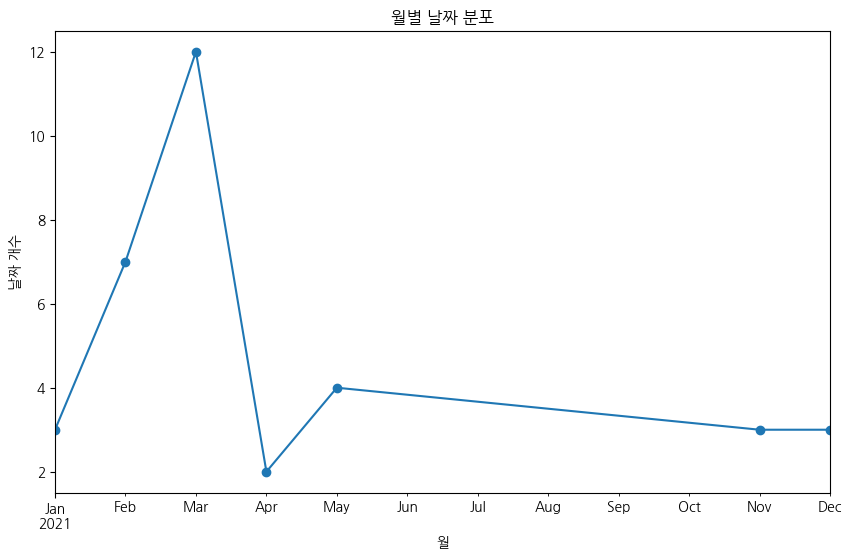

In [112]:
unique_dates = pd.to_datetime(baddate_2021)
monthly_counts = unique_dates.to_period("M").value_counts().sort_index()

# 시각화
plt.figure(figsize=(10, 6))
monthly_counts.plot(kind='line', marker='o')
plt.title('월별 날짜 분포')
plt.xlabel('월')
plt.ylabel('날짜 개수')
plt.show()

In [113]:
baddate_2022 = bad_2022['측정일시'].dt.date.unique()
print(baddate_2022)

[datetime.date(2022, 1, 9) datetime.date(2022, 1, 10)
 datetime.date(2022, 2, 11) datetime.date(2022, 2, 12)
 datetime.date(2022, 2, 25) datetime.date(2022, 3, 4)
 datetime.date(2022, 3, 25) datetime.date(2022, 4, 19)
 datetime.date(2022, 5, 23) datetime.date(2022, 9, 29)
 datetime.date(2022, 10, 1) datetime.date(2022, 11, 9)
 datetime.date(2022, 11, 10) datetime.date(2022, 12, 13)]


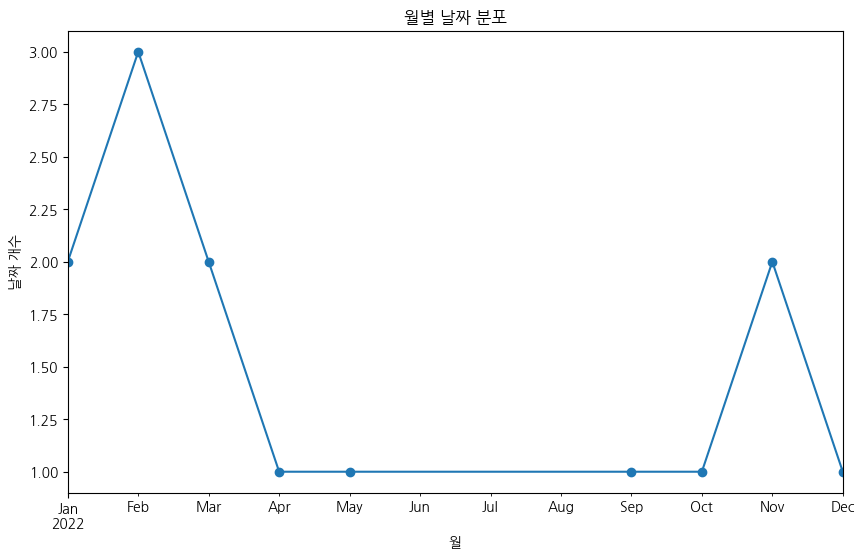

In [114]:
unique_dates1 = pd.to_datetime(baddate_2022)
monthly_counts1 = unique_dates1.to_period("M").value_counts().sort_index()

# 시각화
plt.figure(figsize=(10, 6))
monthly_counts1.plot(kind='line', marker='o')
plt.title('월별 날짜 분포')
plt.xlabel('월')
plt.ylabel('날짜 개수')
plt.show()

- 공통적으로 미세먼지/초미세먼지 농도 위험 이상은 2월-3월 빈도가 높음
- 집중되는 기간 기준(2일이상 지속) 3일 전후 택배량을 관측하기로 결정

- 2021년 집중되는 기간(2일이상 지속)
  - 1월 13, 14, 15일
  - 2월 12, 13, 14일, 15일
  - 3월은 중간중간 하루이틀을 빼면 2주차부터 5주차까지 계속 집중되어 있으므로 3월 1주차 이후부터 데이터 살펴보기
  - 4월 21, 22일
  - 5월 7, 8일, 24, 25일
  - 11월 19, 20, 21일
  - 12월 15, 16일
- 2022년 집중되는 기간
  - 1월 9일, 10일
  - 2월 11, 12일
- 2022년이 2021년보다 상대적으로 적은 이유는 미세먼지 발생은 상당수가 중국이 공장을 운영하면서 발생하는 대기오염에 달려있는데, 당시 중국에서 코로나가 심하게 퍼지면서 공장지대까지 전부 봉쇄에 들어간 영향이라고 봄

## 생활/건강 택배량 구하기

### 택배 수신지역이 서울인 데이터 불러오기

In [115]:
os_2021 = pd.read_csv(DATA_PATH + '/rec_21.csv')
os_2022 = pd.read_csv(DATA_PATH + '/rec_22.csv')
ss_2021 = pd.read_csv(DATA_PATH + '/rec_send_21.csv')
ss_2022 = pd.read_csv(DATA_PATH + '/rec_send_22.csv')

In [116]:
os_2021.head()

,DL_YMD,SEND_CTPV_NM,SEND_CTPV_CD,REC_CTPV_NM,REC_CTPV_CD,REC_CTGG_NM,REC_CTGG_CD,E_C_01,E_C_02,E_C_03,E_C_04,E_C_05,E_C_06,E_C_07,E_C_08,E_C_09,E_C_10,E_C_11
0,20210103,충청북도,43.0,서울특별시,11.0,종로구,11110.0,0.0,4.0,0.0,0.0,11.0,0.0,200.0,0.0,0.0,0.0,0.0
1,20210103,충청북도,43.0,서울특별시,11.0,중구,11140.0,0.0,7.0,0.0,0.0,13.0,0.0,179.0,3.0,0.0,0.0,0.0
2,20210103,충청북도,43.0,서울특별시,11.0,용산구,11170.0,0.0,7.0,0.0,0.0,20.0,0.0,337.0,3.0,0.0,0.0,0.0
3,20210103,충청북도,43.0,서울특별시,11.0,성동구,11200.0,0.0,7.0,0.0,0.0,19.0,0.0,347.0,3.0,0.0,0.0,0.0
4,20210103,충청북도,43.0,서울특별시,11.0,광진구,11215.0,0.0,5.0,0.0,0.0,22.0,0.0,359.0,5.0,0.0,0.0,0.0


In [117]:
os_2022.head()

,DL_YMD,SEND_CTPV_NM,SEND_CTPV_CD,REC_CTPV_NM,REC_CTPV_CD,REC_CTGG_NM,REC_CTGG_CD,E_C_01,E_C_02,E_C_03,E_C_04,E_C_05,E_C_06,E_C_07,E_C_08,E_C_09,E_C_10,E_C_11
0,20220125,경기도,41.0,서울특별시,11.0,종로구,11110.0,0.0,11814.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,20220125,경기도,41.0,서울특별시,11.0,중구,11140.0,0.0,14172.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,20220125,경기도,41.0,서울특별시,11.0,용산구,11170.0,0.0,17873.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,20220125,경기도,41.0,서울특별시,11.0,성동구,11200.0,0.0,24515.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,20220125,경기도,41.0,서울특별시,11.0,광진구,11215.0,0.0,21419.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [118]:
ss_2021.head()

,DL_YMD,SEND_CTPV_NM,SEND_CTPV_CD,SEND_CTGG_NM,SEND_CTGG_CD,REC_CTPV_NM,REC_CTPV_CD,REC_CTGG_NM,REC_CTGG_CD,E_C_01,E_C_02,E_C_03,E_C_04,E_C_05,E_C_06,E_C_07,E_C_08,E_C_09,E_C_10,E_C_11
0,20210115,서울특별시,11.0,양천구,11470.0,서울특별시,11.0,종로구,11110.0,4.0,23.0,0.0,8.0,37.0,3.0,11.0,0.0,22.0,12.0,5.0
1,20210115,서울특별시,11.0,양천구,11470.0,서울특별시,11.0,중구,11140.0,5.0,31.0,9.0,10.0,29.0,4.0,19.0,0.0,38.0,8.0,10.0
2,20210115,서울특별시,11.0,양천구,11470.0,서울특별시,11.0,용산구,11170.0,0.0,28.0,3.0,29.0,45.0,5.0,15.0,3.0,22.0,12.0,25.0
3,20210115,서울특별시,11.0,양천구,11470.0,서울특별시,11.0,성동구,11200.0,0.0,45.0,5.0,24.0,35.0,3.0,39.0,5.0,57.0,20.0,25.0
4,20210115,서울특별시,11.0,양천구,11470.0,서울특별시,11.0,광진구,11215.0,0.0,27.0,3.0,17.0,56.0,8.0,29.0,0.0,31.0,12.0,32.0


In [119]:
ss_2022.head()

,DL_YMD,SEND_CTPV_NM,SEND_CTPV_CD,SEND_CTGG_NM,SEND_CTGG_CD,REC_CTPV_NM,REC_CTPV_CD,REC_CTGG_NM,REC_CTGG_CD,E_C_01,E_C_02,E_C_03,E_C_04,E_C_05,E_C_06,E_C_07,E_C_08,E_C_09,E_C_10,E_C_11
0,20220129,서울특별시,11.0,서초구,11650.0,서울특별시,11.0,종로구,11110.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,20220129,서울특별시,11.0,서초구,11650.0,서울특별시,11.0,중구,11140.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,20220129,서울특별시,11.0,서초구,11650.0,서울특별시,11.0,용산구,11170.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,20220129,서울특별시,11.0,서초구,11650.0,서울특별시,11.0,성동구,11200.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,20220129,서울특별시,11.0,서초구,11650.0,서울특별시,11.0,광진구,11215.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 날짜, 수신지, 생활/건강 기준으로 데이터 전처리

In [120]:
os_2021 = os_2021.drop(['SEND_CTPV_NM',	'SEND_CTPV_CD',	'REC_CTPV_NM',	'REC_CTPV_CD', 'REC_CTGG_CD'], axis = 1)
os_2022 = os_2022.drop(['SEND_CTPV_NM',	'SEND_CTPV_CD',	'REC_CTPV_NM',	'REC_CTPV_CD', 'REC_CTGG_CD'], axis = 1)
ss_2021 = ss_2021.drop(['SEND_CTPV_NM',	'SEND_CTPV_CD',	'SEND_CTGG_NM',	'SEND_CTGG_CD',	'REC_CTPV_NM',	'REC_CTPV_CD', 'REC_CTGG_CD'], axis = 1)
ss_2022 = ss_2022.drop(['SEND_CTPV_NM',	'SEND_CTPV_CD',	'SEND_CTGG_NM',	'SEND_CTGG_CD',	'REC_CTPV_NM',	'REC_CTPV_CD', 'REC_CTGG_CD'], axis = 1)

In [121]:
os_2021.head()

,DL_YMD,REC_CTGG_NM,E_C_01,E_C_02,E_C_03,E_C_04,E_C_05,E_C_06,E_C_07,E_C_08,E_C_09,E_C_10,E_C_11
0,20210103,종로구,0.0,4.0,0.0,0.0,11.0,0.0,200.0,0.0,0.0,0.0,0.0
1,20210103,중구,0.0,7.0,0.0,0.0,13.0,0.0,179.0,3.0,0.0,0.0,0.0
2,20210103,용산구,0.0,7.0,0.0,0.0,20.0,0.0,337.0,3.0,0.0,0.0,0.0
3,20210103,성동구,0.0,7.0,0.0,0.0,19.0,0.0,347.0,3.0,0.0,0.0,0.0
4,20210103,광진구,0.0,5.0,0.0,0.0,22.0,0.0,359.0,5.0,0.0,0.0,0.0


In [122]:
os_2022.head()

,DL_YMD,REC_CTGG_NM,E_C_01,E_C_02,E_C_03,E_C_04,E_C_05,E_C_06,E_C_07,E_C_08,E_C_09,E_C_10,E_C_11
0,20220125,종로구,0.0,11814.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,20220125,중구,0.0,14172.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,20220125,용산구,0.0,17873.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,20220125,성동구,0.0,24515.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,20220125,광진구,0.0,21419.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [123]:
ss_2021.head()

,DL_YMD,REC_CTGG_NM,E_C_01,E_C_02,E_C_03,E_C_04,E_C_05,E_C_06,E_C_07,E_C_08,E_C_09,E_C_10,E_C_11
0,20210115,종로구,4.0,23.0,0.0,8.0,37.0,3.0,11.0,0.0,22.0,12.0,5.0
1,20210115,중구,5.0,31.0,9.0,10.0,29.0,4.0,19.0,0.0,38.0,8.0,10.0
2,20210115,용산구,0.0,28.0,3.0,29.0,45.0,5.0,15.0,3.0,22.0,12.0,25.0
3,20210115,성동구,0.0,45.0,5.0,24.0,35.0,3.0,39.0,5.0,57.0,20.0,25.0
4,20210115,광진구,0.0,27.0,3.0,17.0,56.0,8.0,29.0,0.0,31.0,12.0,32.0


In [124]:
columns = {'DL_YMD' : '보낸날짜',
           'REC_CTGG_NM' : '지역',
           'E_C_01' : '가구/인테리어',
           'E_C_02' : '기타',
           'E_C_03' : '도서/음반',
           'E_C_04' : '디지털/음반',
           'E_C_05' : '생활/건강',
           'E_C_06' : '스포츠/레저',
           'E_C_07' : '식품',
           'E_C_08' : '출산/육아',
           'E_C_09' : '패션의류',
           'E_C_10' : '패션잡화',
           'E_C_11' : '화장품/미용'
            }

os_2021 = os_2021.rename(columns = columns)
os_2022 = os_2022.rename(columns = columns)
ss_2021 = ss_2021.rename(columns = columns)
ss_2022 = ss_2022.rename(columns = columns)

In [125]:
seoul_2021 = pd.concat([os_2021, ss_2021], axis = 0)
seoul_2022 = pd.concat([os_2022, ss_2022], axis = 0)

In [126]:
seoul_hel_2021 = seoul_2021[['보낸날짜', '지역', '생활/건강']]
seoul_hel_2021.head()

,보낸날짜,지역,생활/건강
0,20210103,종로구,11.0
1,20210103,중구,13.0
2,20210103,용산구,20.0
3,20210103,성동구,19.0
4,20210103,광진구,22.0


In [127]:
seoul_hel_2022 = seoul_2022[['보낸날짜', '지역', '생활/건강']]
seoul_hel_2022.head()

,보낸날짜,지역,생활/건강
0,20220125,종로구,0.0
1,20220125,중구,0.0
2,20220125,용산구,0.0
3,20220125,성동구,0.0
4,20220125,광진구,0.0


In [128]:
dateonly_2021 = seoul_hel_2021.groupby('보낸날짜')['생활/건강'].sum().reset_index()
dateonly_2021.head()

,보낸날짜,생활/건강
0,20210101,5800.0
1,20210102,47160.0
2,20210103,32735.0
3,20210104,528909.0
4,20210105,299065.0


In [129]:
dateonly_2022 = seoul_hel_2022.groupby('보낸날짜')['생활/건강'].sum().reset_index()
dateonly_2022.head()

,보낸날짜,생활/건강
0,20220101,0.0
1,20220102,0.0
2,20220103,12.0
3,20220104,1281.0
4,20220105,118332.0


In [130]:
dateonly_2022.head(20)

,보낸날짜,생활/건강
0,20220101,0.0
1,20220102,0.0
2,20220103,12.0
3,20220104,1281.0
4,20220105,118332.0
5,20220106,0.0
6,20220107,0.0
7,20220108,0.0
8,20220109,0.0
9,20220110,0.0


# 2021년 미세먼지 위험일과 생활건강 택배량 비교시각화

## 1월 13일 기준 데이터 만들기

In [131]:
dateonly_2021['보낸날짜'] = pd.to_datetime(dateonly_2021['보낸날짜'], format='%Y%m%d')

In [132]:
# 2021년 1월 13일
date_2101 = pd.to_datetime('20210113', format='%Y%m%d')

# 선택한 날짜의 3일 전과 3일 후 계산
start_date = date_2101 - pd.DateOffset(days=3)
end_date = date_2101 + pd.DateOffset(days=3)

# 선택한 날짜 범위에 해당하는 데이터 추출
selected_data = dateonly_2021[(dateonly_2021['보낸날짜'] >= start_date) & (dateonly_2021['보낸날짜'] <= end_date)]

# '생활/건강' 총 합 구하기
health2101 = selected_data['생활/건강'].sum()
print(health2101)

1543120.0


## 2월 12일 기준 데이터 만들기

In [133]:
# 2021년 2월 12일
date_2102 = pd.to_datetime('20210212', format='%Y%m%d')

# 선택한 날짜의 3일 전과 3일 후 계산
start_date = date_2102 - pd.DateOffset(days=3)
end_date = date_2102 + pd.DateOffset(days=3)

# 선택한 날짜 범위에 해당하는 데이터 추출
selected_data = dateonly_2021[(dateonly_2021['보낸날짜'] >= start_date) & (dateonly_2021['보낸날짜'] <= end_date)]

# '생활/건강' 총 합 구하기
health2102 = selected_data['생활/건강'].sum()
print(health2102)

855235.0


## 3월 기준 데이터 만들기
- 2021년 3월은 2주차부터 계속 연달아 미세먼지 농도가 위험이상

In [134]:
# 2021년 3월 10일
date_2103_1 = pd.to_datetime('20210310', format='%Y%m%d')

# 선택한 날짜의 3일 전과 3일 후 계산
start_date = date_2103_1 - pd.DateOffset(days=3)
end_date = date_2103_1 + pd.DateOffset(days=3)

# 선택한 날짜 범위에 해당하는 데이터 추출
selected_data = dateonly_2021[(dateonly_2021['보낸날짜'] >= start_date) & (dateonly_2021['보낸날짜'] <= end_date)]

# '생활/건강' 총 합 구하기
health2103_1 = selected_data['생활/건강'].sum()
print(health2103_1)

1419723.0


In [135]:
# 2021년 3월 17일
date_2103_2 = pd.to_datetime('20210317', format='%Y%m%d')

# 선택한 날짜의 3일 전과 3일 후 계산
start_date = date_2103_2 - pd.DateOffset(days=3)
end_date = date_2103_2 + pd.DateOffset(days=3)

# 선택한 날짜 범위에 해당하는 데이터 추출
selected_data = dateonly_2021[(dateonly_2021['보낸날짜'] >= start_date) & (dateonly_2021['보낸날짜'] <= end_date)]

# '생활/건강' 총 합 구하기
health2103_2 = selected_data['생활/건강'].sum()
print(health2103_2)

1369077.0


In [136]:
# 2021년 3월 24일
date_2103_3 = pd.to_datetime('20210324', format='%Y%m%d')

# 선택한 날짜의 3일 전과 3일 후 계산
start_date = date_2103_3 - pd.DateOffset(days=3)
end_date = date_2103_3 + pd.DateOffset(days=3)

# 선택한 날짜 범위에 해당하는 데이터 추출
selected_data = dateonly_2021[(dateonly_2021['보낸날짜'] >= start_date) & (dateonly_2021['보낸날짜'] <= end_date)]

# '생활/건강' 총 합 구하기
health2103_3 = selected_data['생활/건강'].sum()
print(health2103_3)

1358336.0


## 4월 21일 기준 데이터

In [137]:
# 2021년 4월 21일
date_2104 = pd.to_datetime('20210421', format='%Y%m%d')

# 선택한 날짜의 3일 전과 3일 후 계산
start_date = date_2104 - pd.DateOffset(days=3)
end_date = date_2104 + pd.DateOffset(days=3)

# 선택한 날짜 범위에 해당하는 데이터 추출
selected_data = dateonly_2021[(dateonly_2021['보낸날짜'] >= start_date) & (dateonly_2021['보낸날짜'] <= end_date)]

# '생활/건강' 총 합 구하기
health2104 = selected_data['생활/건강'].sum()
print(health2104)

1334845.0


## 5월 기준 데이터

In [138]:
# 2021년 5월 7일
date_2105_1 = pd.to_datetime('20210507', format='%Y%m%d')

# 선택한 날짜의 3일 전과 3일 후 계산
start_date = date_2105_1 - pd.DateOffset(days=3)
end_date = date_2105_1 + pd.DateOffset(days=3)

# 선택한 날짜 범위에 해당하는 데이터 추출
selected_data = dateonly_2021[(dateonly_2021['보낸날짜'] >= start_date) & (dateonly_2021['보낸날짜'] <= end_date)]

# '생활/건강' 총 합 구하기
health2105_1 = selected_data['생활/건강'].sum()
print(health2105_1)

1158881.0


In [139]:
# 2021년 5월 24일
date_2105_2 = pd.to_datetime('20210524', format='%Y%m%d')

# 선택한 날짜의 3일 전과 3일 후 계산
start_date = date_2105_2 - pd.DateOffset(days=3)
end_date = date_2105_2 + pd.DateOffset(days=3)

# 선택한 날짜 범위에 해당하는 데이터 추출
selected_data = dateonly_2021[(dateonly_2021['보낸날짜'] >= start_date) & (dateonly_2021['보낸날짜'] <= end_date)]

# '생활/건강' 총 합 구하기
health2105_2 = selected_data['생활/건강'].sum()
print(health2105_2)

1221339.0


## 11월 19일 기준

In [140]:
# 2021년 11월 19일
date_2111 = pd.to_datetime('20211119', format='%Y%m%d')

# 선택한 날짜의 3일 전과 3일 후 계산
start_date = date_2111 - pd.DateOffset(days=3)
end_date = date_2111 + pd.DateOffset(days=3)

# 선택한 날짜 범위에 해당하는 데이터 추출
selected_data = dateonly_2021[(dateonly_2021['보낸날짜'] >= start_date) & (dateonly_2021['보낸날짜'] <= end_date)]

# '생활/건강' 총 합 구하기
health2111 = selected_data['생활/건강'].sum()
print(health2111)

1190620.0


## 12월 15일 기준

In [141]:
# 2021년 12월 15일
date_2112 = pd.to_datetime('20211215', format='%Y%m%d')

# 선택한 날짜의 3일 전과 3일 후 계산
start_date = date_2112 - pd.DateOffset(days=3)
end_date = date_2112 + pd.DateOffset(days=3)

# 선택한 날짜 범위에 해당하는 데이터 추출
selected_data = dateonly_2021[(dateonly_2021['보낸날짜'] >= start_date) & (dateonly_2021['보낸날짜'] <= end_date)]

# '생활/건강' 총 합 구하기
health2112 = selected_data['생활/건강'].sum()
print(health2112)

1405270.0


## 2021년 비교기준 만들기

In [142]:
# 전체 물류량 합 구하기
total_2021 = dateonly_2021['생활/건강'].sum()

# 1주일 기준으로 나누어 평균 구하기
weekavg_2021 = total_2021 / (365 / 7)

# 결과 출력
print("1주일 기준 2021년 평균 물류량:", weekavg_2021)

1주일 기준 2021년 평균 물류량: 1292118.819178082


In [143]:
# 각 달의 물류량 합 구하기
monthly_totals = dateonly_2021.resample('M', on='보낸날짜')['생활/건강'].sum()

# 각 달의 일 수 계산
days_in_month = monthly_totals.index.days_in_month

# 1주일 기준으로 나누어 움직인 평균 구하기
weekly_averages = monthly_totals / (days_in_month / 7)

print("월별 물류량 합:")
print(monthly_totals.astype(int))
print("\n1주일 기준으로 움직인 평균:")
print(weekly_averages.astype(int))

월별 물류량 합:
보낸날짜
2021-01-31    6061781
2021-02-28    5172264
2021-03-31    6409811
2021-04-30    5683953
2021-05-31    5276787
2021-06-30    5522727
2021-07-31    5672751
2021-08-31    5628380
2021-09-30    5223572
2021-10-31    5074081
2021-11-30    5626156
2021-12-31    6022504
Freq: M, Name: 생활/건강, dtype: int64

1주일 기준으로 움직인 평균:
보낸날짜
2021-01-31    1368789
2021-02-28    1293066
2021-03-31    1447376
2021-04-30    1326255
2021-05-31    1191532
2021-06-30    1288636
2021-07-31    1280943
2021-08-31    1270924
2021-09-30    1218833
2021-10-31    1145760
2021-11-30    1312769
2021-12-31    1359920
Freq: M, dtype: int64


In [144]:
weekly_averages_df = pd.DataFrame({'월': weekly_averages.index.strftime('%Y-%m'), '1주일 기준 평균': weekly_averages.astype(int)})
weekly_averages_df = weekly_averages_df.reset_index(drop=True)
weekly_averages_df

,월,1주일 기준 평균
0,2021-01,1368789
1,2021-02,1293066
2,2021-03,1447376
3,2021-04,1326255
4,2021-05,1191532
5,2021-06,1288636
6,2021-07,1280943
7,2021-08,1270924
8,2021-09,1218833
9,2021-10,1145760


## 비교그래프

### 월마다의 1주일치 물류량 평균 비교

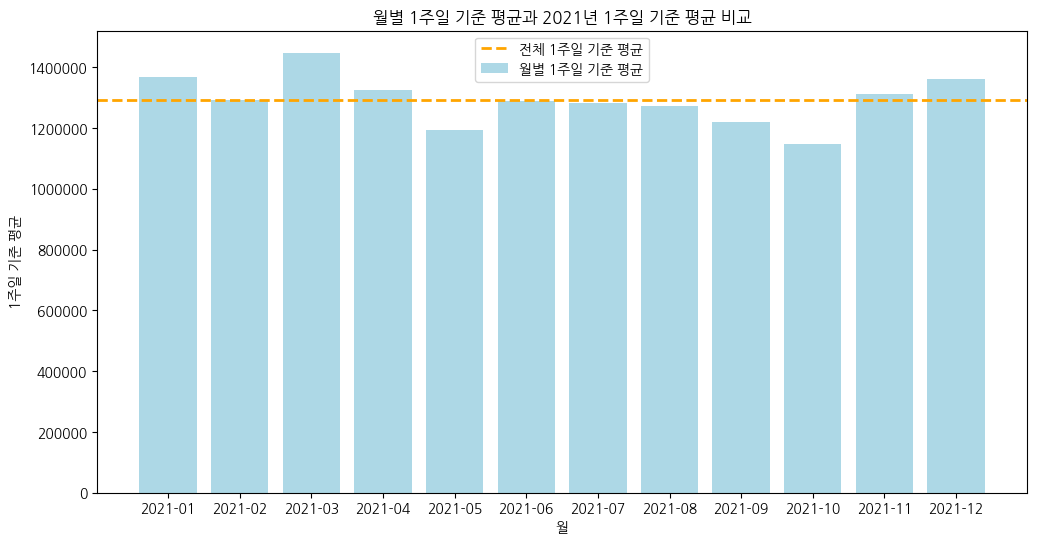

In [145]:
# 막대그래프 그리기
plt.figure(figsize=(12, 6))

# 각 월의 1주일 기준 평균 막대그래프
plt.bar(weekly_averages_df['월'], weekly_averages_df['1주일 기준 평균'], color='lightblue', label='월별 1주일 기준 평균')

# 전체 1주일 기준 평균 수평선
plt.axhline(weekavg_2021, color='orange', linestyle='dashed', linewidth=2, label='전체 1주일 기준 평균')

plt.title('월별 1주일 기준 평균과 2021년 1주일 기준 평균 비교')
plt.xlabel('월')
plt.ylabel('1주일 기준 평균')
plt.legend()
plt.ticklabel_format(style='plain', axis='y')
plt.show()

### 1월 그래프

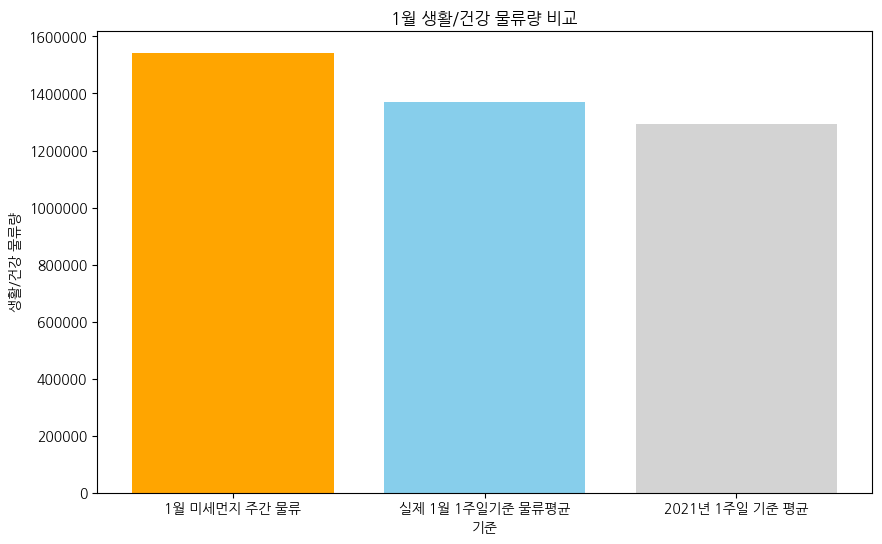

In [146]:
selected_value = weekly_averages_df[weekly_averages_df['월'] == '2021-01']['1주일 기준 평균'].values[0]

# 막대그래프 시각화
plt.figure(figsize=(10, 6))
plt.bar(['1월 미세먼지 주간 물류', '실제 1월 1주일기준 물류평균', '2021년 1주일 기준 평균'], [health2101, selected_value, weekavg_2021], color=['orange', 'skyblue', 'lightgray'])
plt.title(f'1월 생활/건강 물류량 비교')
plt.xlabel('기준')
plt.ylabel('생활/건강 물류량')

plt.ticklabel_format(style='plain', axis='y')

plt.show()

### 2월 비교

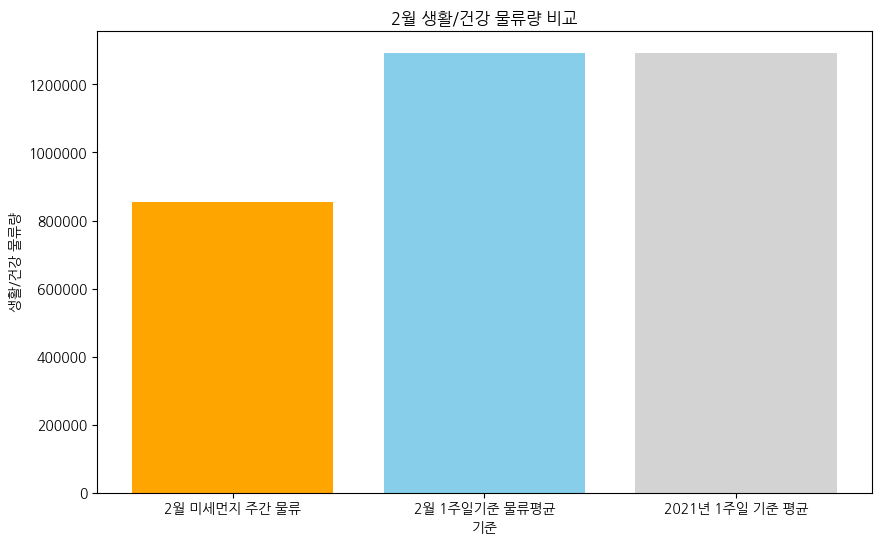

In [147]:
selected_value = weekly_averages_df[weekly_averages_df['월'] == '2021-02']['1주일 기준 평균'].values[0]

# 막대그래프 시각화
plt.figure(figsize=(10, 6))
plt.bar(['2월 미세먼지 주간 물류', '2월 1주일기준 물류평균', '2021년 1주일 기준 평균'], [health2102, selected_value, weekavg_2021], color=['orange', 'skyblue', 'lightgray'])
plt.title(f'2월 생활/건강 물류량 비교')
plt.xlabel('기준')
plt.ylabel('생활/건강 물류량')

plt.ticklabel_format(style='plain', axis='y')

plt.show()

### 3월 비교

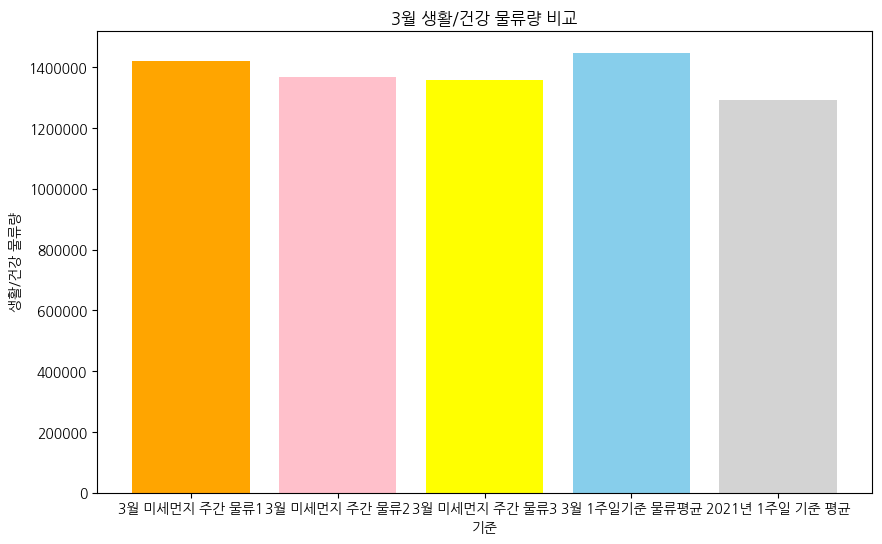

In [148]:
selected_value = weekly_averages_df[weekly_averages_df['월'] == '2021-03']['1주일 기준 평균'].values[0]

# 막대그래프 시각화
plt.figure(figsize=(10, 6))
plt.bar(['3월 미세먼지 주간 물류1', '3월 미세먼지 주간 물류2', '3월 미세먼지 주간 물류3', '3월 1주일기준 물류평균', '2021년 1주일 기준 평균'], [health2103_1, health2103_2, health2103_3, selected_value, weekavg_2021], color=['orange', 'pink', 'yellow', 'skyblue', 'lightgray'])
plt.title(f'3월 생활/건강 물류량 비교')
plt.xlabel('기준')
plt.ylabel('생활/건강 물류량')

plt.ticklabel_format(style='plain', axis='y')

plt.show()

### 4월 비교

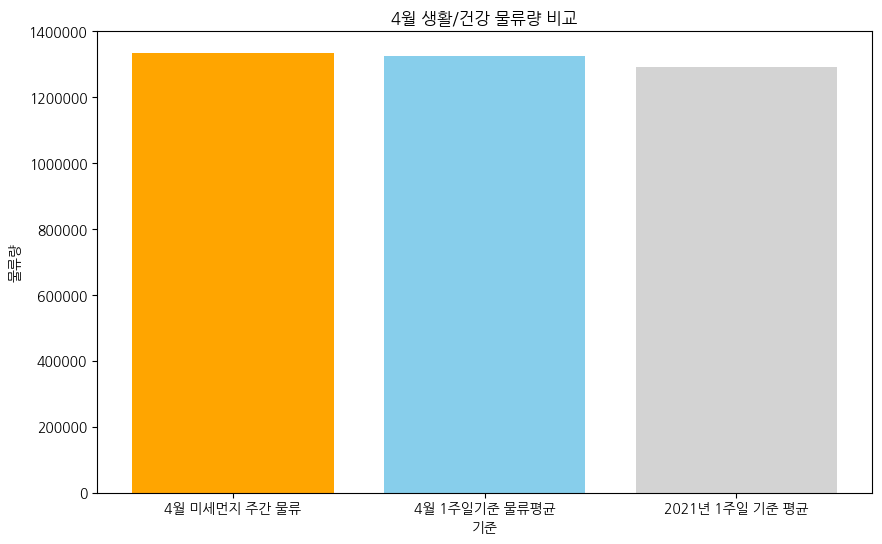

In [149]:
selected_value = weekly_averages_df[weekly_averages_df['월'] == '2021-04']['1주일 기준 평균'].values[0]

# 막대그래프 시각화
plt.figure(figsize=(10, 6))
plt.bar(['4월 미세먼지 주간 물류', '4월 1주일기준 물류평균', '2021년 1주일 기준 평균'], [health2104, selected_value, weekavg_2021], color=['orange', 'skyblue', 'lightgray'])
plt.title(f'4월 생활/건강 물류량 비교')
plt.xlabel('기준')
plt.ylabel('물류량')

plt.ticklabel_format(style='plain', axis='y')

plt.show()

### 5월 비교

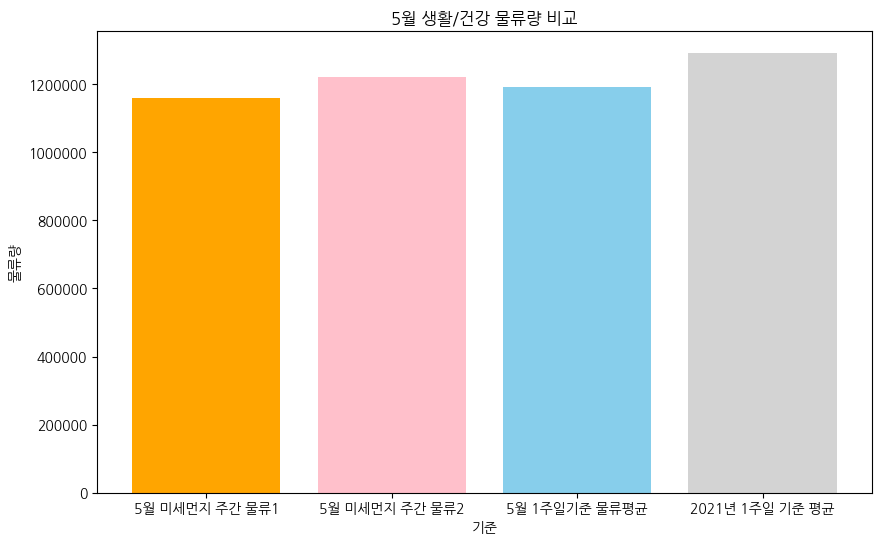

In [150]:
selected_value = weekly_averages_df[weekly_averages_df['월'] == '2021-05']['1주일 기준 평균'].values[0]

# 막대그래프 시각화
plt.figure(figsize=(10, 6))
plt.bar(['5월 미세먼지 주간 물류1', '5월 미세먼지 주간 물류2', '5월 1주일기준 물류평균', '2021년 1주일 기준 평균'], [health2105_1, health2105_2, selected_value, weekavg_2021], color=['orange', 'pink', 'skyblue', 'lightgray'])
plt.title(f'5월 생활/건강 물류량 비교')
plt.xlabel('기준')
plt.ylabel('물류량')

plt.ticklabel_format(style='plain', axis='y')

plt.show()

### 11월 비교

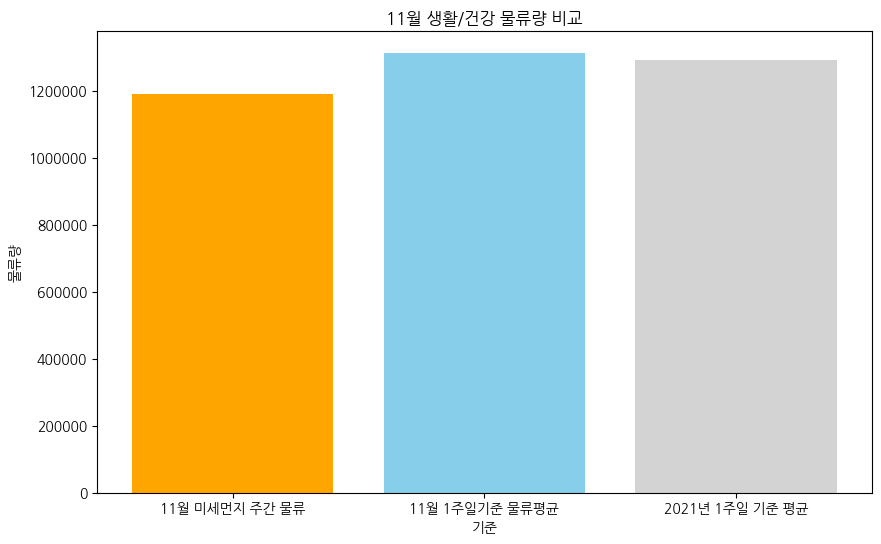

In [151]:
selected_value = weekly_averages_df[weekly_averages_df['월'] == '2021-11']['1주일 기준 평균'].values[0]

# 막대그래프 시각화
plt.figure(figsize=(10, 6))
plt.bar(['11월 미세먼지 주간 물류', '11월 1주일기준 물류평균', '2021년 1주일 기준 평균'], [health2111, selected_value, weekavg_2021], color=['orange', 'skyblue', 'lightgray'])
plt.title(f'11월 생활/건강 물류량 비교')
plt.xlabel('기준')
plt.ylabel('물류량')

plt.ticklabel_format(style='plain', axis='y')

plt.show()

### 12월 비교

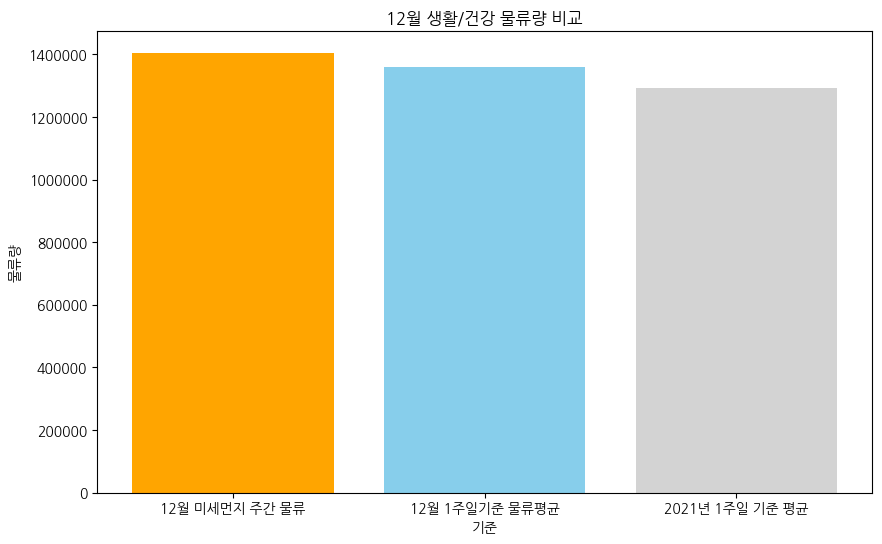

In [152]:
selected_value = weekly_averages_df[weekly_averages_df['월'] == '2021-12']['1주일 기준 평균'].values[0]

# 막대그래프 시각화
plt.figure(figsize=(10, 6))
plt.bar(['12월 미세먼지 주간 물류', '12월 1주일기준 물류평균', '2021년 1주일 기준 평균'], [health2112, selected_value, weekavg_2021], color=['orange', 'skyblue', 'lightgray'])
plt.title(f'12월 생활/건강 물류량 비교')
plt.xlabel('기준')
plt.ylabel('물류량')

plt.ticklabel_format(style='plain', axis='y')

plt.show()

## 2022년 미세먼지 위험일과 생활건강 택배량 비교시각화

## 1월 9일 기준 데이터

In [153]:
dateonly_2022['보낸날짜'] = pd.to_datetime(dateonly_2022['보낸날짜'], format='%Y%m%d')

In [154]:
# 2022년 1월 9일
date_2201 = pd.to_datetime('20220109', format='%Y%m%d')

# 선택한 날짜의 3일 전과 3일 후 계산
start_date = date_2201 - pd.DateOffset(days=3)
end_date = date_2201 + pd.DateOffset(days=3)

# 선택한 날짜 범위에 해당하는 데이터 추출
selected_data = dateonly_2022[(dateonly_2022['보낸날짜'] >= start_date) & (dateonly_2022['보낸날짜'] <= end_date)]

# '생활/건강' 총 합 구하기
health2201 = selected_data['생활/건강'].sum()
print(health2201)

0.0


- 파업영향으로 물류가...

## 2월 11일 기준 데이터

In [155]:
# 2022년 2월 11일
date_2202 = pd.to_datetime('20220211', format='%Y%m%d')

# 선택한 날짜의 3일 전과 3일 후 계산
start_date = date_2202 - pd.DateOffset(days=3)
end_date = date_2202 + pd.DateOffset(days=3)

# 선택한 날짜 범위에 해당하는 데이터 추출
selected_data = dateonly_2022[(dateonly_2022['보낸날짜'] >= start_date) & (dateonly_2022['보낸날짜'] <= end_date)]

# '생활/건강' 총 합 구하기
health2202 = selected_data['생활/건강'].sum()
print(health2202)

1305496.0


## 2022년 비교기준 만들기

In [156]:
# 전체 물류량 합 구하기
total_2022 = dateonly_2022['생활/건강'].sum()

# 1주일 기준으로 나누어 평균 구하기
weekavg_2022 = total_2022 / (365 / 7)

# 결과 출력
print("1주일 기준 2021년 평균 물류량:", weekavg_2022)

1주일 기준 2021년 평균 물류량: 1042674.2602739725


In [157]:
# 각 달의 물류량 합 구하기
monthly_totals_22 = dateonly_2022.resample('M', on='보낸날짜')['생활/건강'].sum()

# 각 달의 일 수 계산
days_in_month_22 = monthly_totals_22.index.days_in_month

# 1주일 기준으로 나누어 움직인 평균 구하기
weekly_averages_22 = monthly_totals_22 / (days_in_month_22 / 7)

print("월별 물류량 합:")
print(monthly_totals_22.astype(int))
print("\n1주일 기준으로 움직인 평균:")
print(weekly_averages_22.astype(int))

월별 물류량 합:
보낸날짜
2022-01-31     119625
2022-02-28    5151597
2022-03-31    5396960
2022-04-30    4738028
2022-05-31    4892886
2022-06-30    4741209
2022-07-31    4729631
2022-08-31    5286998
2022-09-30    4631689
2022-10-31    4621510
2022-11-30    4918978
2022-12-31    5138904
Freq: M, Name: 생활/건강, dtype: int64

1주일 기준으로 움직인 평균:
보낸날짜
2022-01-31      27012
2022-02-28    1287899
2022-03-31    1218668
2022-04-30    1105539
2022-05-31    1104845
2022-06-30    1106282
2022-07-31    1067981
2022-08-31    1193838
2022-09-30    1080727
2022-10-31    1043566
2022-11-30    1147761
2022-12-31    1160397
Freq: M, dtype: int64


In [158]:
weekly_avedf_22 = pd.DataFrame({'월': weekly_averages_22.index.strftime('%Y-%m'), '1주일 기준 평균': weekly_averages_22.astype(int)})
weekly_avedf_22 = weekly_avedf_22.reset_index(drop=True)
weekly_avedf_22

,월,1주일 기준 평균
0,2022-01,27012
1,2022-02,1287899
2,2022-03,1218668
3,2022-04,1105539
4,2022-05,1104845
5,2022-06,1106282
6,2022-07,1067981
7,2022-08,1193838
8,2022-09,1080727
9,2022-10,1043566


## 비교그래프

### 월마다의 1주일치 물류량 평균 비교

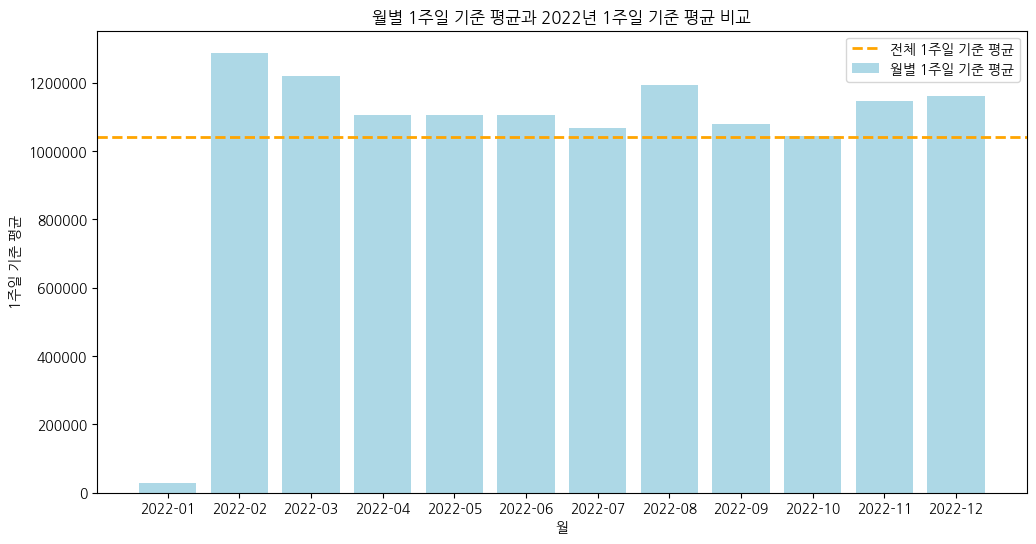

In [159]:
# 막대그래프 그리기
plt.figure(figsize=(12, 6))

# 각 월의 1주일 기준 평균 막대그래프
plt.bar(weekly_avedf_22['월'], weekly_avedf_22['1주일 기준 평균'], color='lightblue', label='월별 1주일 기준 평균')

# 전체 1주일 기준 평균 수평선
plt.axhline(weekavg_2022, color='orange', linestyle='dashed', linewidth=2, label='전체 1주일 기준 평균')

plt.title('월별 1주일 기준 평균과 2022년 1주일 기준 평균 비교')
plt.xlabel('월')
plt.ylabel('1주일 기준 평균')
plt.legend()
plt.ticklabel_format(style='plain', axis='y')
plt.show()

- 평균이 1월때문에 왜곡치가 큼
- 21년도때 8월은 평균 아래였는데, 평균보다 많이 위인 이유는 22년도 8월달에 코로나 대유행이 있어서로 추정

### 2월 비교

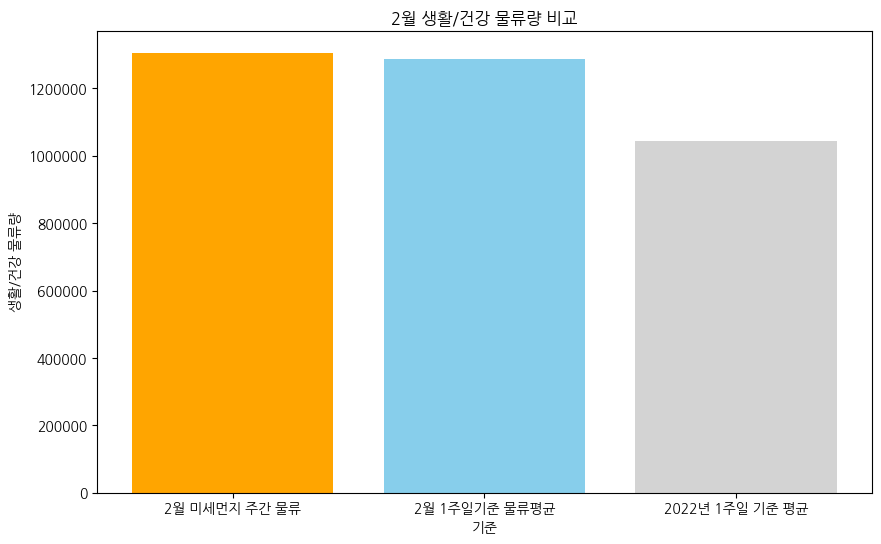

In [160]:
selected_value = weekly_avedf_22[weekly_avedf_22['월'] == '2022-02']['1주일 기준 평균'].values[0]

# 막대그래프 시각화
plt.figure(figsize=(10, 6))
plt.bar(['2월 미세먼지 주간 물류', '2월 1주일기준 물류평균', '2022년 1주일 기준 평균'], [health2202, selected_value, weekavg_2022], color=['orange', 'skyblue', 'lightgray'])
plt.title(f'2월 생활/건강 물류량 비교')
plt.xlabel('기준')
plt.ylabel('생활/건강 물류량')

plt.ticklabel_format(style='plain', axis='y')

plt.show()

# 결론
- 그래프를 보아서 영향을 미친다고 하기에는 뭔가 애매하다
- 이러한 결과가 나오는 이유
  - 2021, 2022년 중반까지는 코로나의 영향이 너무 큼 : 코로나 때문에 생활건강물품이 늘어난건지, 아니면 미세먼지 때문인지 파악 불가
  - 2022년 미세먼지 위험농도 이상 데이터가 너무 적음 : 중국쪽 봉쇄영향
  - 2022년 1월 파업때문에 미세먼지 위험농도 발생기간 데이터가 존재하지 않음
- 우선 주로 환절기라 불리는 2-4월, 11-12월쯤이 전체 평균보다는 웃도는 물류량이 나오기는 함.
- 문제는 머신러닝 분석용으로 넣기에는 발생일1, 미발생일0 이런식으로 넣어야 하는데 시기별 데이터라 23년도 측정일 데이터가 존재하지 않아서 23년도를 싹 비울 수는 없는게...문제...
- 생각해보면 장기적으로 이어지는 환절기나 코로나 문제와는 달리 미세먼지 위험농도는 날짜별로 단발적으로 발생하기 때문에 그때그때 필요한 물품을 즉석에서 사지 이를 대비해 미리 주문하거나 그럴 거 같진 않다...